In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.imagesource {
    font-size: xx-small;
}
</style>
""")

from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

### L&S 88 - Social Networks

# Lab 1: Personal networks

Welcome to the first lab for L&S 88 - Social Networks!

In this lab, we will start to analyze the data that we collected as part of the first homework assignment. We will be exploring the structure of Berkeley students' personal networks.

## 1. Introduction

As we discussed last class, there are many different ways to study social networks. One is to study *personal networks*. Personal network studies focus on a particular individual's network members. This approach can be used to study people's sources of social support. Social support is thought to be an important factor for a wide range of different outcomes such as mental and physical health; employment; and education.

Here is an  of the personal network formed by someone's Facebook friends:

![Facebook personal network example](figures/backstrom_kleinberg_2013_fb_ego_example.png)

<div class='imagesource'>
Backstrom and Kleinberg (2013) - [Romantic partnerships and the dispersion of social ties.](http://dl.acm.org/citation.cfm?id=2531642)
</div>


Conceptually, we can think of someone's personal network as looking like this:

![A personal network](figures/ego_network.png)

The focal individual in a personal network study is sometimes called *ego* and the other people who are socially connected to ego are sometimes called *alters*.

One of the most common ways researchers study personal networks is to use surveys. Last week, we talked about a specific survey question:

![GSS important matters question](figures/gss_2004_important_matters.png)

**Question** What is the network that this question is asking about? What are the nodes, and what are the edges?

[Answer here]

For the rest of this lab, when we refer to 'personal networks,' we'll mean the network that this survey question is asking about.

## 2. Survey of Berkeley students

Now we'll turn to the results of the data that you all collected as part of your first homework assignment. 
Our goal will be use our data to better understand the personal networks of Berkeley students.

### 2.1 Opening the data

We'll begin by loading the datascience package.

In [2]:
from datascience import *

The dataset is available at the url `http://www.dennisfeehan.org/teaching/berkeley_survey_clean.csv`.

**Question** Write code that loads the dataset as a table called `survey`.

In [3]:
url = 'http://www.dennisfeehan.org/teaching/berkeley_survey_clean.csv'
survey = Table.read_table(url)

### 2.2 Exploring the data

Before we start to perform any analysis on a new dataset, it is important to look at the data and be sure that we understand how it is structured. In most cases, there will be documentation that comes with the survey dataset to explain how to analyze it. In our case, we already have a basic understanding of how the data are structured because we all collected and entered it ourselves.

### 2.2.1 Age of respondents

Let's start by getting a sense of who responded to the survey. We'll look at the age and class year of our respondents.

**Question** How many people responded to the survey?

In [4]:
num_respondents = survey.num_rows
num_respondents

97

To get a sense of what the data look like, print the first several rows.

In [5]:
survey

interview_number,interview_date,interview_time,respondent_age,respondent_class,respondent_home,number_alters,alter1_gender,alter1_age,alter1_class,alter1_home,alter2_gender,alter2_age,alter2_class,alter2_home,alter3_gender,alter3_age,alter3_class,alter3_home,alter4_gender,alter4_age,alter4_class,alter4_home,alter5_gender,alter5_age,alter5_class,alter5_home
self,08/29/2016,9:57 PM,18,Freshman,Rest of US,5,F,54,Other,Rest of US,M,59,Other,Rest of US,F,20,Sophomore,Rest of US,F,17,Other,Rest of US,F,75,Other,Bay Area
1,08/29/2016,8:47 PM,18,Freshman,Rest of World,2,F,46,Other,Rest of World,M,50,Other,Rest of World,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,08/29/2016,8:52 PM,17,Freshman,LA,4,F,42,Other,LA,F,35,Other,Rest of US,M,22,Junior,LA,F,21,Sophomore,LA,nan,nan,nan,nan
3,08/29/2016,8:59 PM,19,Sophomore,Bay Area,4,F,52,Other,Bay Area,F,19,Sophomore,Bay Area,F,19,Sophomore,Rest of California,M,19,Sophomore,LA,nan,nan,nan,nan
4,08/29/2016,3:35 PM,19,Sophomore,Bay Area,5,M,53,Other,Rest of World,F,53,Other,Rest of World,M,19,Sophomore,LA,M,25,Senior,LA,F,19,Sophomore,Rest of California
self,08/29/2016,4:00,20,Senior,Rest of World,4,M,23,Senior,Rest of World,F,40,Other,Rest of World,M,50,Other,Rest of World,M,21,Sophomore,Rest of World,nan,nan,nan,nan
1,08/29/2016,3:30,20,Junior,Rest of California,4,F,53,Other,Rest of California,M,58,Other,Rest of California,F,24,Other,Rest of California,M,20,Junior,Rest of California,nan,nan,nan,nan
2,08/29/2016,3:40,17,Freshman,LA,5,M,17,Freshman,LA,F,50,Other,LA,F,15,Other,LA,F,16,Other,LA,F,18,Other,Rest of US
3,08/30/2016,4:00,22,Junior,Bay Area,4,M,23,Other,Rest of World,M,25,Other,Rest of World,F,22,Other,LA,M,21,Senior,Rest of World,nan,nan,nan,nan
self,09/05/2016,6:31 PM,20,Junior,Rest of World,5,F,20,Junior,Rest of World,M,20,Junior,Rest of US,F,21,Senior,Rest of World,M,20,Junior,Rest of World,M,18,Other,Rest of World


**Question** What do you expect will be the age range of people who responded to the survey? Why?

[Answer here]

Now let's investigate the actual data.

**Question** What are the highest and lowest ages of the people who responded to the survey?

In [6]:
survey.column('respondent_age').max()

25

In [7]:
survey.column('respondent_age').min()

17

**Question** What was the average age of a survey respondent?

In [8]:
survey.column('respondent_age').mean()

19.731958762886599

**Question** Draw a histogram of the ages of respondents.

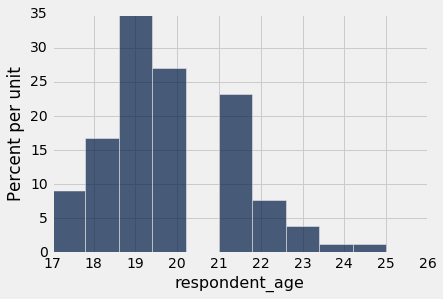

In [9]:
survey.select('respondent_age').hist()

**Question** The default looks a bit wonky because we haven't specified the bins to use. Draw the histogram again, this time using bins that are one year of age wide.


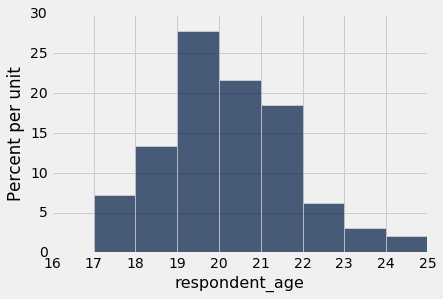

In [10]:
survey.select('respondent_age').hist(bins=np.arange(16, 26, 1))

**Question** About what percentage of respondents are under age 20?

[Answer here]

### 2.2.2 Class year of respondents

OK, we have a pretty good handle on the age of people who responded to the survey. Now let's look at their class years.

**Question** About what proportion of respondents would you expect to be Freshmen? Seniors? Why?

[Answer here]

**Question** Now calculate the actual proportion of freshman and senior respondents. <br>
*[Hint: you may find the `where` method useful.]*

In [11]:
num_fresh = survey.where('respondent_class', are.equal_to('Freshman')).num_rows
num_fresh / num_respondents

0.1958762886597938

In [12]:
num_sr = survey.where('respondent_class', are.equal_to('Senior')).num_rows
num_sr / num_respondents

0.21649484536082475

There is a faster way to count the number of different values of a categorical variable using the `group` method. You haven't talked about this in class yet, but you will. 

**Question** See if you can figure out how `group` works, and then use it to produce a count of the class of our respondents.<br>
*[Hint: you can look at the documentation by running `Table.group?`.]*

In [13]:
Table.group?

In [14]:
survey.group('respondent_class')

respondent_class,count
Freshman,19
Junior,31
Other,3
Senior,21
Sophomore,23


**Question** See if you can use `group` and the `barh` methods to create a bar chart with the counts of respondents by class.

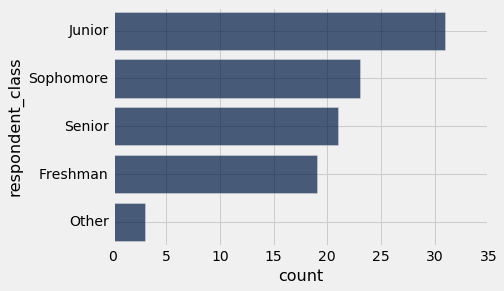

In [15]:
tmp = survey.group('respondent_class').sort('count', descending=True)
tmp.barh('respondent_class')

### 2.2.3 Additional exploration

OK, now it's your turn! Explore one more thing about the survey respondents (we're going to hold off on analyzing the alters for the time being). You can pick anything that you are curious about, but some possibilities include:

* where respondents are from
* how many confidants get reported
* what time of day the surveys were conducted

Whatever you decide to look at, be sure to come up with a quantitative way to understand the respondents better and also be sure to make at least one plot.

## 3. Personal networks

OK, so now we have a sense of what kind of respondents we have in our sample. Now we can turn to the actual personal network data

**Question** Using `group`, make a table of of number of confidants our respondents reported.

In [16]:
survey.groups('number_alters')

number_alters,count
1,2
2,3
3,14
4,16
5,43
6,3
6+,14
7,1
8,1


In order to analyze this variable, we are going to have to decide what to do about the respondents who reported having more than 5 confidants. The function below was written to do this in one particular way.

**Question** Look at the function below. What does it do? How does it handle respondents who reported more than 5 confidants?

In [17]:
def recode_number_alters(na):
    if na in ['1', '2', '3', '4', '5']:
        return int(na)
    elif na in ['6', '6+', '7', '8']:
        return 6

**Question** Using `recode_number_alters`, see if you can create a new column called `num_confidants` which has the recoded values.

In [18]:
survey['num_confidants'] = survey.apply(recode_number_alters, 'number_alters')

**Question** Double-check that the function worked the way you thought it
would by creating a table of the `num_confidants` column. You may also find it helpful to create a histogram.

In [19]:
survey.group('num_confidants')

num_confidants,count
1,2
2,3
3,14
4,16
5,43
6,19


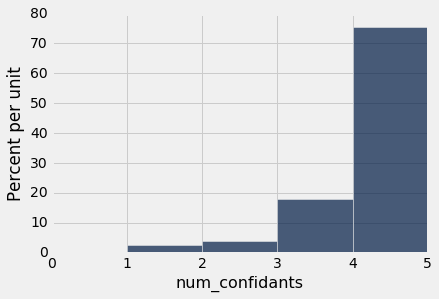

In [20]:
survey.hist('num_confidants', bins=np.arange(0,6,1))

**Question** Do you find anything surprising about these survey respondents' personal networks? Are they bigger or smaller than the results we saw from the General Social Survey? 

### 4. Alters

Now we'll start to look more closely at the people that respondents reported having in their personal networks. We don't quite know enough Python to look at all of the alters. So we will focus on the relationship between the respondents and the first alter named. Fortunately, everyone in the survey reported at least one alter.

**Question** What do you expect to see when we compare the ages of the respondents and the ages of the first alters? (Any reasonable prediction is helpful here.)

[Answer here]

**Question** Make a scatter plot that compares the age of respondents (x axis) and the age of the first alter (y axis).

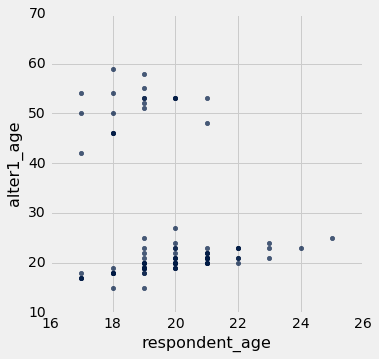

In [21]:
survey.scatter('respondent_age', 'alter1_age')

**Question** How would you describe any patterns in the scatter plot? Can you come up with a hypothesis for what might explain them?

[Answer here]

**Question** If you conducted another survey, what additional information could you collect to see if your hypothesis is right?

[Answer here]

### 5. Quick survey

**Question** Please go take this very quick [survey](https://goo.gl/forms/xVxlUcEoSiIQTALH2) about the class so far.

### 6. Submit the lab

You're almost done! Now please create a pdf version of your completed lab by going to the Jupyter 'File' menu, choosing 'Download as' and then 'PDF via LaTeX (.pdf)'. Please save the resulting .pdf on your computer and then submit the .pdf on bcourses.

**The lab must be submitted by the end of the day on Monday, Sep. 12**